In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [16]:
df = pd.read_csv('../processed_data/processed_BTC_data.csv')
print(len(df))
df.set_index('time', inplace=True)
df.head(3)


20085


,open,high,low,close,vwap,upper_b1,lower_b1,upper_b2,lower_b2,upper_b3,lower_b3,basis,upper,lower,parabolicsar,twap,base_line,leadingspan1,leadingspan2,kumo_up,kumo_down,volume,volume_ma,adx,efi,atr,obv,roc,cci,smoothing_line_1,target_close
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-01 19:00:00,19802.0,19893.0,19795.0,19852.5,19888.060962,20019.750835,19756.371088,20151.440708,19624.681215,20283.130581,19492.991342,19778.675,19925.240779,19632.109221,19645.828577,19947.094156,19795.25,19972.75,19984.25,19984.25,19972.75,1483.148,3248.54970,22.012443,-981.521523,102.004408,-27813.854,1.009973,78.071799,39.474125,19789.5
2022-09-01 19:15:00,19852.5,19857.5,19773.5,19789.5,19887.480374,20018.877060,19756.083688,20150.273746,19624.687002,20281.670433,19493.290316,19772.025,19903.139254,19640.910746,19657.175434,19945.442308,19795.25,19972.75,19984.25,19984.25,19972.75,1103.097,3093.28725,20.825300,-10769.177163,100.718379,-28916.951,0.337170,40.427097,53.390397,19817.0
2022-09-01 19:30:00,19789.5,19817.0,19774.5,19817.0,19887.112572,20018.341640,19755.883505,20149.570708,19624.654437,20280.799776,19493.425369,19769.775,19896.092645,19643.457355,19668.068417,19943.594937,19792.50,19972.75,19984.25,19984.25,19972.75,673.509,3058.09550,19.722953,-6584.795068,96.559923,-28243.442,-0.331942,43.031377,53.561861,19862.5


In [17]:
df.columns

Index(['open', 'high', 'low', 'close', 'vwap', 'upper_b1', 'lower_b1',
       'upper_b2', 'lower_b2', 'upper_b3', 'lower_b3', 'basis', 'upper',
       'lower', 'parabolicsar', 'twap', 'base_line', 'leadingspan1',
       'leadingspan2', 'kumo_up', 'kumo_down', 'volume', 'volume_ma', 'adx',
       'efi', 'atr', 'obv', 'roc', 'cci', 'smoothing_line_1', 'target_close'],
      dtype='object')

In [18]:
columns_we_trust = ['open', 'high', 'low', 'close', 'vwap', 'upper_b1', 'lower_b1',
       'upper_b2', 'lower_b2', 'upper_b3', 'lower_b3', 'basis', 'upper',
       'lower', 'parabolicsar', 'twap', 'volume', 'volume_ma', 'adx',
       'efi', 'atr', 'obv', 'roc', 'cci', 'target_close']



# Filtering the DataFrame to include only the columns specified in 'columns_we_trust'
filtered_df = df[columns_we_trust]



In [19]:
filtered_df.columns

Index(['open', 'high', 'low', 'close', 'vwap', 'upper_b1', 'lower_b1',
       'upper_b2', 'lower_b2', 'upper_b3', 'lower_b3', 'basis', 'upper',
       'lower', 'parabolicsar', 'twap', 'volume', 'volume_ma', 'adx', 'efi',
       'atr', 'obv', 'roc', 'cci', 'target_close'],
      dtype='object')

In [20]:
# Columns that can be categorized (ALL)
# Vwap can be categorized as positive if its above close, and 0 if below.
# Parabolicsar: Above Close Price: When the Parabolic SAR is above the close price, it often indicates a potential downtrend.
"""
        Below Close Price: When the Parabolic SAR is below the close price, it generally suggests a potential uptrend.
        Near Close Price: When the Parabolic SAR is near the close price, it might indicate a period of consolidation or uncertainty.
        Far From Close Price: When the Parabolic SAR is far from the close price, it may suggest that the current trend (up or down) is strong.
        """
#twap :
""" Here are some sensible ways to categorize TWAP:
        Above Close Price: When the TWAP is above the close price, it suggests that the average traded price was higher during the time interval. This could be an indication that the price may be overvalued.
        Below Close Price: When the TWAP is below the close price, it suggests that the average traded price was lower during the time interval. This could be an indication that the price may be undervalued.
        Near Close Price: When the TWAP is near the close price, this could indicate market equilibrium for that time period, neither bullish nor bearish.
        Rate of Change: Consider the rate at which TWAP is changing relative to previous periods. Increasing or decreasing trends in TWAP can provide additional categories for analysis.
        By creating these categories, you can gain additional insights into market behavior and potentially improve trading strategies. Would you like to proceed with this categorization?
        """

' Here are some sensible ways to categorize TWAP:\n        Above Close Price: When the TWAP is above the close price, it suggests that the average traded price was higher during the time interval. This could be an indication that the price may be overvalued.\n        Below Close Price: When the TWAP is below the close price, it suggests that the average traded price was lower during the time interval. This could be an indication that the price may be undervalued.\n        Near Close Price: When the TWAP is near the close price, this could indicate market equilibrium for that time period, neither bullish nor bearish.\n        Rate of Change: Consider the rate at which TWAP is changing relative to previous periods. Increasing or decreasing trends in TWAP can provide additional categories for analysis.\n        By creating these categories, you can gain additional insights into market behavior and potentially improve trading strategies. Would you like to proceed with this categorization?\

## Start categorizing

Here we start the creation of function to categorize this data. We aim to take a variable by variable approach to better define the different values and value_counts

In [21]:
# Function to categorize high and low based on relative percentage change
def categorize_high_low_relative(row):
    high = row['high']
    low = row['low']
    diff_percent = ((high - low) / ((high + low) / 2)) * 100
    if diff_percent < 1:
        return 'small_range'
    elif diff_percent < 4:
        return 'medium_range'
    else:
        return 'large_range'

# Function to categorize open and close based on relative percentage change
def categorize_open_close_relative(row):
    open_price = row['open']
    close = row['close']
    diff_percent = (abs(open_price - close) / ((open_price + close) / 2)) * 100
    if diff_percent < 0.5:
        return 'small_change'
    elif diff_percent < 2.5:
        return 'medium_change'
    else:
        return 'large_change'

# Categorizing high and low using relative percentage change
filtered_df['high_low_category_relative'] = filtered_df.apply(categorize_high_low_relative, axis=1)

# Categorizing open and close using relative percentage change
filtered_df['open_close_category_relative'] = filtered_df.apply(categorize_open_close_relative, axis=1)

# Show the value_counts
print(filtered_df['high_low_category_relative'].value_counts())
print(filtered_df["open_close_category_relative"].value_counts())



C:\Users\jbethune\AppData\Local\Temp\ipykernel_2316\2411248582.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['high_low_category_relative'] = filtered_df.apply(categorize_high_low_relative, axis=1)


high_low_category_relative
small_range     19211
medium_range      855
large_range        19
Name: count, dtype: int64
open_close_category_relative
small_change     19009
medium_change     1057
large_change        19
Name: count, dtype: int64


C:\Users\jbethune\AppData\Local\Temp\ipykernel_2316\2411248582.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['open_close_category_relative'] = filtered_df.apply(categorize_open_close_relative, axis=1)


In [22]:
# Categorize Twap

def categorize_twap_distance_from_close(row):
  twap = row['twap']
  close = row['close']

  # Calcular la distancia entre TWAP y el precio de cierre
  diff = np.abs(twap - close)

  # Definir los límites de las categorías
  thresholds = [-1000, -500, 0, 500, 1000]
  categories = ['significantly below close', 'slightly below close', 'near close', 'slightly above close', 'significantly above close']

  # Asignar la categoría correspondiente
  for i in range(len(thresholds)):
    if diff < thresholds[i]:
      return categories[i]

  # Si el valor no está dentro de ninguno de los límites, asignar la categoría 'outlier'
  return 'outlier'

# Categorizar TWAP basado en su distancia desde el precio de cierre
filtered_df['twap_distance_from_close_category'] = filtered_df.apply(categorize_twap_distance_from_close, axis=1)

C:\Users\jbethune\AppData\Local\Temp\ipykernel_2316\4129279001.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['twap_distance_from_close_category'] = filtered_df.apply(categorize_twap_distance_from_close, axis=1)


In [23]:
filtered_df["twap_distance_from_close_category"].value_counts()

twap_distance_from_close_category
slightly above close         19119
significantly above close      736
outlier                        230
Name: count, dtype: int64

In [24]:
filtered_df.columns

Index(['open', 'high', 'low', 'close', 'vwap', 'upper_b1', 'lower_b1',
       'upper_b2', 'lower_b2', 'upper_b3', 'lower_b3', 'basis', 'upper',
       'lower', 'parabolicsar', 'twap', 'volume', 'volume_ma', 'adx', 'efi',
       'atr', 'obv', 'roc', 'cci', 'target_close',
       'high_low_category_relative', 'open_close_category_relative',
       'twap_distance_from_close_category'],
      dtype='object')

In [25]:
# Using quantiles to define categories for the 'high_low' and 'open_close' variables
# This ensures that each category will have approximately the same number of observations

# Define quantile-based categories for high_low
high_low_diff = filtered_df['high'] - filtered_df['low']
high_low_quantiles = high_low_diff.quantile([0.25, 0.5, 0.75]).values

def categorize_high_low_quantile(diff):
    if diff <= high_low_quantiles[0]:
        return 'small_range'
    elif diff <= high_low_quantiles[1]:
        return 'medium_range'
    elif diff <= high_low_quantiles[2]:
        return 'large_range'
    else:
        return 'very_large_range'

# Define quantile-based categories for open_close
open_close_diff = abs(filtered_df['open'] - filtered_df['close'])
open_close_quantiles = open_close_diff.quantile([0.25, 0.5, 0.75]).values

def categorize_open_close_quantile(diff):
    if diff <= open_close_quantiles[0]:
        return 'small_change'
    elif diff <= open_close_quantiles[1]:
        return 'medium_change'
    elif diff <= open_close_quantiles[2]:
        return 'large_change'
    else:
        return 'very_large_change'

# Apply the quantile-based categorization
filtered_df['high_low_category_quantile'] = high_low_diff.apply(categorize_high_low_quantile)
filtered_df['open_close_category_quantile'] = open_close_diff.apply(categorize_open_close_quantile)

# Show the distribution of the new categories
high_low_category_counts = filtered_df['high_low_category_quantile'].value_counts()
open_close_category_counts = filtered_df['open_close_category_quantile'].value_counts()

high_low_category_counts, open_close_category_counts

C:\Users\jbethune\AppData\Local\Temp\ipykernel_2316\3028772107.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['high_low_category_quantile'] = high_low_diff.apply(categorize_high_low_quantile)
C:\Users\jbethune\AppData\Local\Temp\ipykernel_2316\3028772107.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['open_close_category_quantile'] = open_close_diff.apply(categorize_open_close_quantile)


(high_low_category_quantile
 small_range         5078
 large_range         5014
 medium_range        5008
 very_large_range    4985
 Name: count, dtype: int64,
 open_close_category_quantile
 small_change         5113
 large_change         5046
 very_large_change    4995
 medium_change        4931
 Name: count, dtype: int64)

In [28]:
# After this i will quicksave the data to processed data to access the one with filters and feature selection done

filtered_df.to_csv('../processed_data/Processed_robust_data.csv')

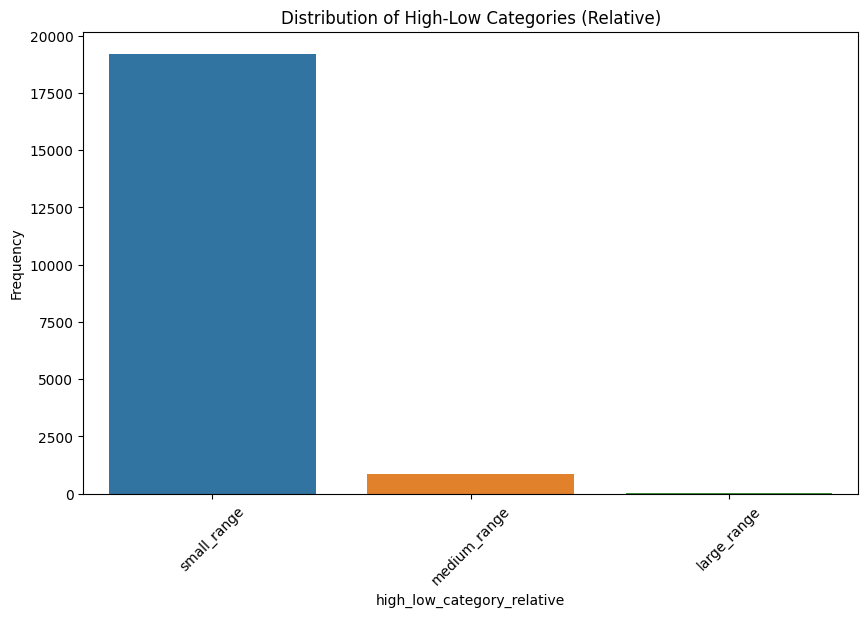

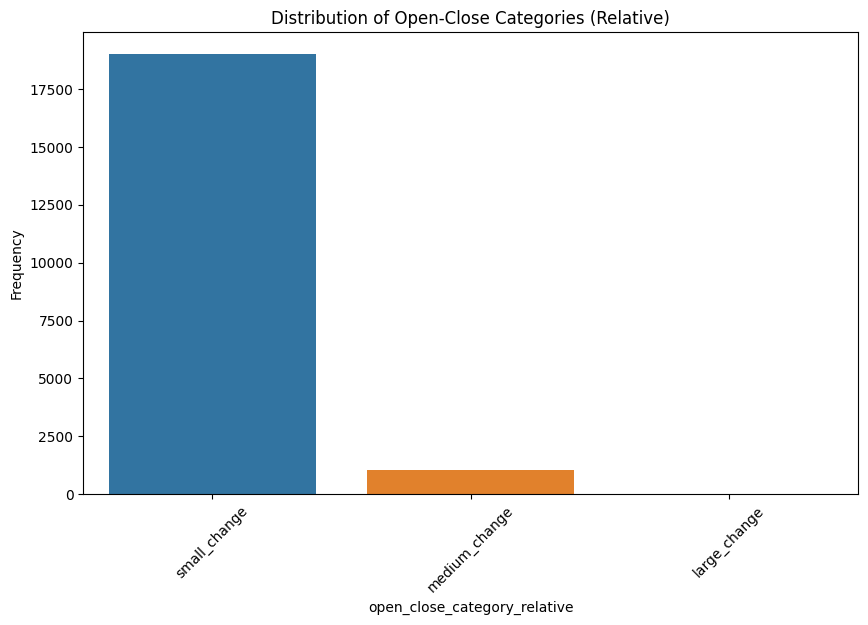

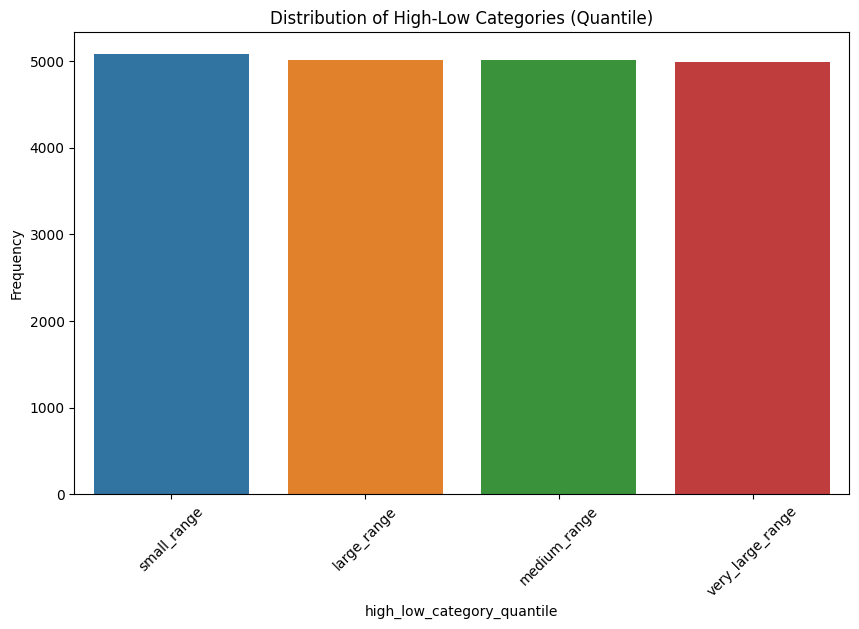

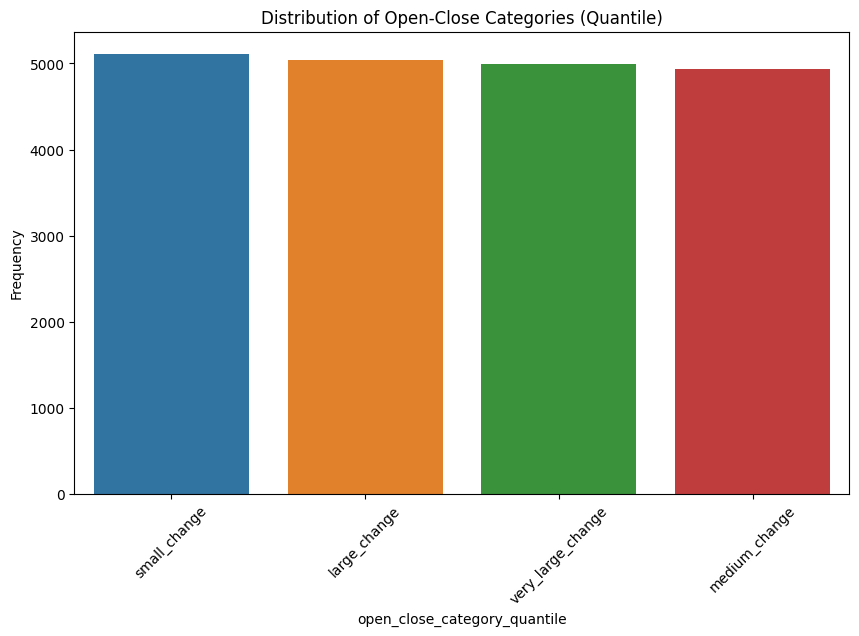

In [26]:
# Now i want to plot to see which acts better graphically the quantiles or the defined paramenters

# Importing required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the categories
def plot_categories(df, column_name, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, order = df[column_name].value_counts().index)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plotting the 'high_low_category_relative' and 'open_close_category_relative' categories
plot_categories(filtered_df, 'high_low_category_relative', 'Distribution of High-Low Categories (Relative)')
plot_categories(filtered_df, 'open_close_category_relative', 'Distribution of Open-Close Categories (Relative)')

# Plotting the 'high_low_category_quantile' and 'open_close_category_quantile' categories
plot_categories(filtered_df, 'high_low_category_quantile', 'Distribution of High-Low Categories (Quantile)')
plot_categories(filtered_df, 'open_close_category_quantile', 'Distribution of Open-Close Categories (Quantile)')


In [ ]:
# Note that I am working on finding the best way to categorize data
import matplotlib.pyplot as plt

# Plotting the 'close' prices for the entire filtered_df
plt.figure(figsize=(15, 8))
plt.plot(filtered_df.index, filtered_df['close'], label='Close Price', alpha=0.5)

# Filtering rows considered to have 'very_large_range' in 'high_low_category_quantile'
very_large_range_df = filtered_df[filtered_df['high_low_category_quantile'] == 'very_large_range']

# Plotting the 'close' prices for rows with 'very_large_range'
plt.scatter(very_large_range_df.index, very_large_range_df['close'], color='red', label='Very Large Range', marker='o')

plt.title('Close Price and Very Large Range Points')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()

plt.show()


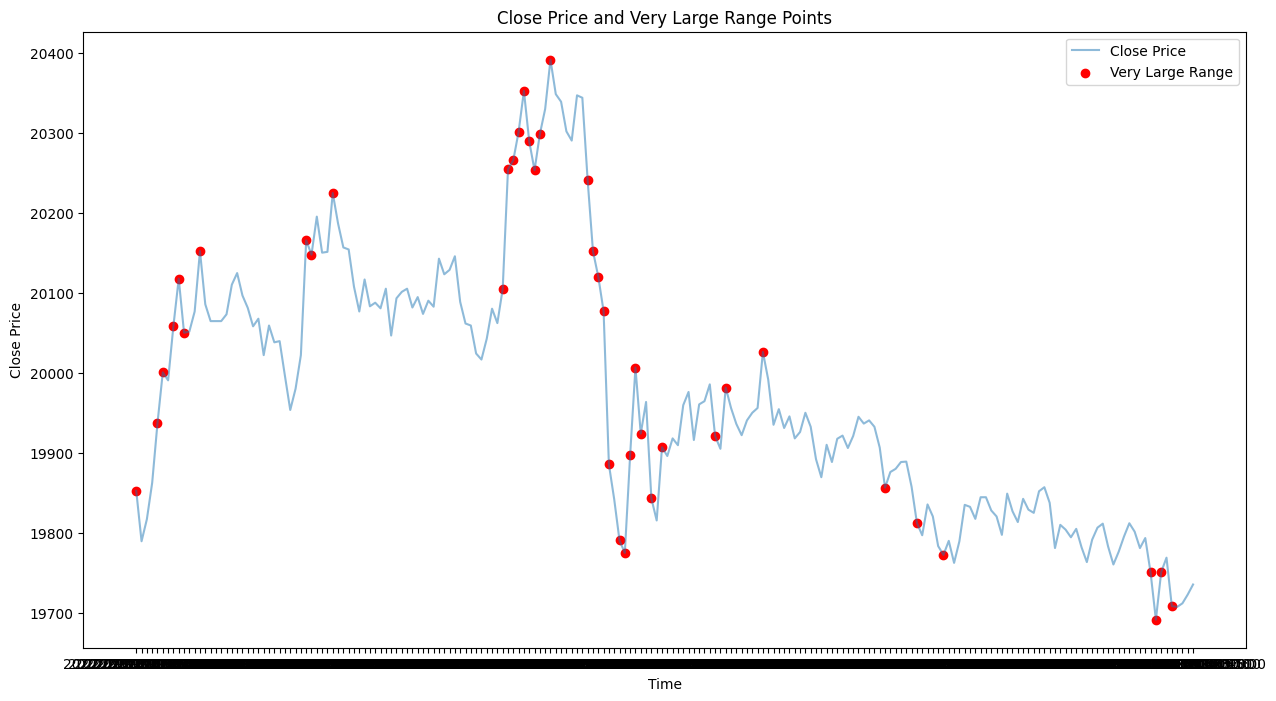

In [27]:
# Defino un df mas pequeño para ver si hemos filtrado alo o no, a primera vista diria que no-_-

import matplotlib.pyplot as plt

# Select a subset of the first 200 rows of the DataFrame
subset_df = filtered_df.head(200)

# Plot the subset DataFrame
plt.figure(figsize=(15, 8))
plt.plot(subset_df.index, subset_df['close'], label='Close Price', alpha=0.5)

# Filtering rows considered to have 'very_large_range' in 'high_low_category_quantile'
very_large_range_df = subset_df[subset_df['high_low_category_quantile'] == 'very_large_range']

# Plotting the 'close' prices for rows with 'very_large_range'
plt.scatter(very_large_range_df.index, very_large_range_df['close'], color='red', label='Very Large Range', marker='o')

plt.title('Close Price and Very Large Range Points')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()


In [37]:
# Actually, this is sort of good. I love the idea behind it. This tool can help us find volatile periods. Also, particular points seem to offer a bet position. Where one can bet and expect to be right or wrong somewhat quickly.
# Let's further investigate this :

def calculate_conditional_probability(df, category_column='high_low_category_relative', target_category='large_range'):
    count_target_followed_by_target = 0
    count_target = 0

    # Loop through the DataFrame, skipping the last 96 rows
    for i in range(len(df) - 96):
        if df.loc[df.index[i], category_column] == target_category:
            count_target += 1
            if any(df.loc[df.index[i+1:i+96], category_column] == target_category):
                count_target_followed_by_target += 1

    # Calculate the conditional probability
    if count_target > 0:
        probability = count_target_followed_by_target / count_target
    else:
        probability = 0
    
    return probability

# Calculate the conditional probability based on the user-provided data
real_probability = calculate_conditional_probability(filtered_df)
real_probability

0.5789473684210527

In [38]:
print(filtered_df["high_low_category_relative"].value_counts())
filtered_df.head(1)

high_low_category_relative
small_range     19211
medium_range      855
large_range        19
Name: count, dtype: int64


,open,high,low,close,vwap,upper_b1,lower_b1,upper_b2,lower_b2,upper_b3,lower_b3,basis,upper,lower,parabolicsar,twap,volume,volume_ma,adx,efi,atr,obv,roc,cci,target_close,high_low_category_relative,open_close_category_relative,twap_distance_from_close_category,high_low_category_quantile,open_close_category_quantile
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-01 19:00:00,19802.0,19893.0,19795.0,19852.5,19888.060962,20019.750835,19756.371088,20151.440708,19624.681215,20283.130581,19492.991342,19778.675,19925.240779,19632.109221,19645.828577,19947.094156,1483.148,3248.5497,22.012443,-981.521523,102.004408,-27813.854,1.009973,78.071799,19789.5,small_range,small_change,slightly above close,very_large_range,very_large_change


In [33]:
# Well, we weren't off, that is over 20000 data samples
len(filtered_df)

20085

In [39]:
# Calculate the conditional probability of the 'very_large_range' category following the 'very_large_range' category in the 'filtered_df' DataFrame.
real_probability = calculate_conditional_probability(filtered_df)

# Print the conditional probability
print(real_probability)

0.5789473684210527


In [1]:
# Considering the great amount of studying we could apply just to this data im thinking of way we could organise work going forward.